In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math 

In [2]:
df = pd.read_csv("ReadingData.csv")
df = df.dropna()
df = df.drop(columns = ['Race', 'Last book you read, you…'])
df.head()

,Age,Sex,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,No,Yes
1,46,Male,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Yes,Yes
2,32,Male,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Yes,Yes
3,27,Male,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Yes,No
4,16,Female,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Yes,No


In [3]:
df = df.rename(columns={
    "How many books did you read during last 12months?"   : "N Books",
    "Read any printed books during last 12months?"        : "Printed Books",
    "Read any audiobooks during last 12months?"           : "Audiobooks",
    "Read any e-books during last 12months?"              : "E-books",
    "Do you happen to read any daily news or newspapers?" : "Reads Newspaper",
    "Do you happen to read any magazines or journals?"    : "Reads Magazines/Journals"
})

In [4]:
df["Printed Books"]            = df["Printed Books"].apply(lambda x: 1 * (x == 'Yes' or x == 1))
df["Audiobooks"]               = df["Audiobooks"].apply(lambda x: 1 * (x == 'Yes' or x == 1))
df["E-books"]                  = df["E-books"].apply(lambda x: 1 * (x == 'Yes' or x == 1))
df["Reads Newspaper"]          = df["Reads Newspaper"].apply(lambda x: 1 * (x == 'Yes' or x == 1))
df["Reads Magazines/Journals"] = df["Reads Magazines/Journals"].apply(lambda x: 1 * (x == 'Yes' or x == 1))
df["Sex"]                      = df["Sex"].apply(lambda x : 1 * (x == 'Female' or x == 1))

In [5]:

age_groups = ['Teen', 'Young Adult', 'Adult', 'Old Adult', 'Senior']
df['Age Group'] = df['Age'].apply(
    lambda x: 
        'Teen' if x < 18 else 
        'Young Adult' if x < 30 else
        'Adult' if x < 50 else
        'Old Adult' if x < 75 else
        'Senior')
df.head()

,Age,Sex,Marital status?,Education,Employement,Incomes,N Books,Printed Books,Audiobooks,E-books,Reads Newspaper,Reads Magazines/Journals,Age Group
0,66,0,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,1,0,1,0,1,Old Adult
1,46,0,Married,High school graduate,Employed full-time,"Less than $10,000",97,1,1,1,1,1,Adult
2,32,0,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,0,1,1,1,1,Adult
3,27,0,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,1,0,1,1,0,Young Adult
4,16,1,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,1,1,0,1,0,Teen


In [6]:
def enumerateUnique(dataframe, string):
    unique = pd.unique(dataframe[string])
    for i in range(len(unique)):
        dataframe[string] = dataframe[string].replace(unique[i], i)
    return unique


In [7]:
uniqueEducation = enumerateUnique(df, 'Education')
uniqueMartial = enumerateUnique(df, 'Marital status?')
uniqueEmployement = enumerateUnique(df, 'Employement')
uniqueIncomes = enumerateUnique(df, 'Incomes')
uniqueIncomes

array(['$20,000 to under $30,000', 'Less than $10,000',
       '$40,000 to under $50,000', '$10,000 to under $20,000',
       '$50,000 to under $75,000', '$100,000 to under $150,000',
       '$75,000 to under $100,000', '9$100,000 to under $150,000',
       '$30,000 to under $40,000', 'Refused'], dtype=object)

<AxesSubplot:>

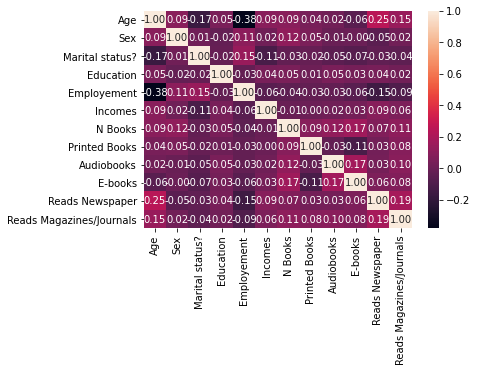

In [8]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

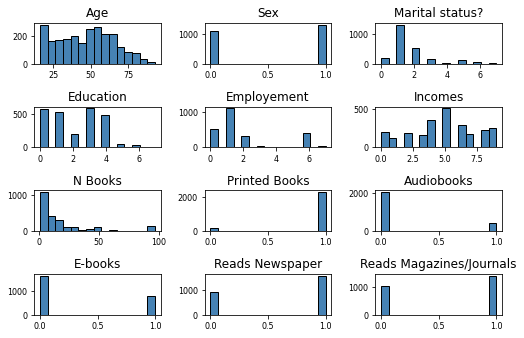

In [9]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

<AxesSubplot:xlabel='Age Group'>

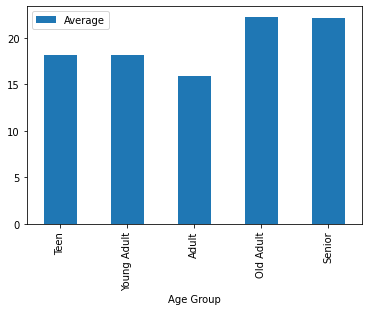

In [10]:
_sum = [{"sum": 0, "count" : 0},
        {"sum": 0, "count" : 0},
        {"sum": 0, "count" : 0},
        {"sum": 0, "count" : 0},
        {"sum": 0, "count" : 0}]
for i, row in df.iterrows():
    obj = _sum[age_groups.index(row['Age Group'])]
    obj['sum']   += row['N Books']
    obj['count'] += 1

avg = []

for i in _sum:
    avg.append(i['sum'] / i['count'])

ageGpAvg = {"Age Group" : age_groups, "Average" : avg}

AgeGroupAvg = pd.DataFrame(ageGpAvg, columns=['Age Group','Average'])
AgeGroupAvg.plot(x='Age Group',y='Average', kind='bar')

#Pelo Menos nos Eua a Leitura é uniforme entre as idades

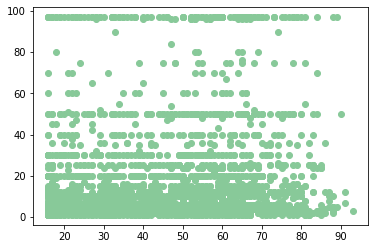

In [11]:
plt.figure()
plt.scatter(x = df['Age'], y = df['N Books'], color = '#88c999')
plt.show()

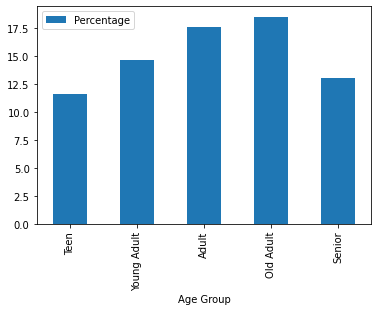

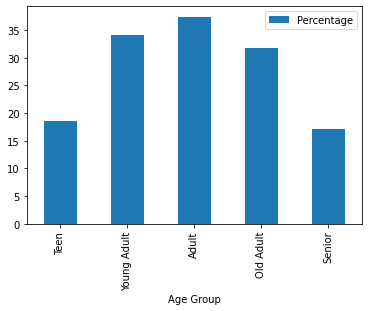

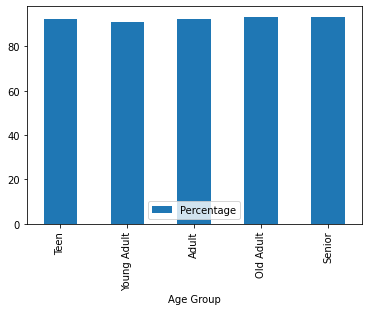

In [16]:
def plot_percentage_of_type_by_age_group(name):
    _sum = [{"sum": 0, "count" : 0},
            {"sum": 0, "count" : 0},
            {"sum": 0, "count" : 0},
            {"sum": 0, "count" : 0},
            {"sum": 0, "count" : 0}]
    for i, row in df.iterrows():
        index = age_groups.index(row['Age Group'])
        if row[name]:
            _sum[index]['sum'] += 1
        _sum[index]['count'] += 1

    pct = []

    for i in _sum:
        pct.append((i['sum'] / i['count']) * 100)

    pct_ = {"Age Group" : age_groups, "Percentage" : pct}

    pctDf = pd.DataFrame(pct_, columns=['Age Group','Percentage'])
    pctDf.plot(x='Age Group',y='Percentage', kind='bar')

plot_percentage_of_type_by_age_group('Audiobooks')
plot_percentage_of_type_by_age_group('E-books')
plot_percentage_of_type_by_age_group('Printed Books')